In [51]:
%pip install pandas scikit-learn imblearn matplotlib plotly nbformat seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Loading

In [53]:
test = pd.read_csv("./Data/test.csv")
train = pd.read_csv("./Data/train.csv")

In [54]:
train['education']=train['education'].fillna(train.education.mode()[0])
test['education']=test['education'].fillna(test.education.mode()[0])

#fill the missing values in previous_year_rating
train['previous_year_rating']=train['previous_year_rating'].fillna(0)
test['previous_year_rating']=test['previous_year_rating'].fillna(0)

In [55]:
df = pd.concat([train, test], axis=0) 
# df = train.copy()
df.size

1096172

In [56]:
df = df.drop_duplicates()


In [57]:
df.interpolate(inplace=True)

C:\Users\Kishore\AppData\Local\Temp\ipykernel_11232\471562723.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(inplace=True)


In [58]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# EXPLORATORY DATA ANALYSIS

### No of Unique Values

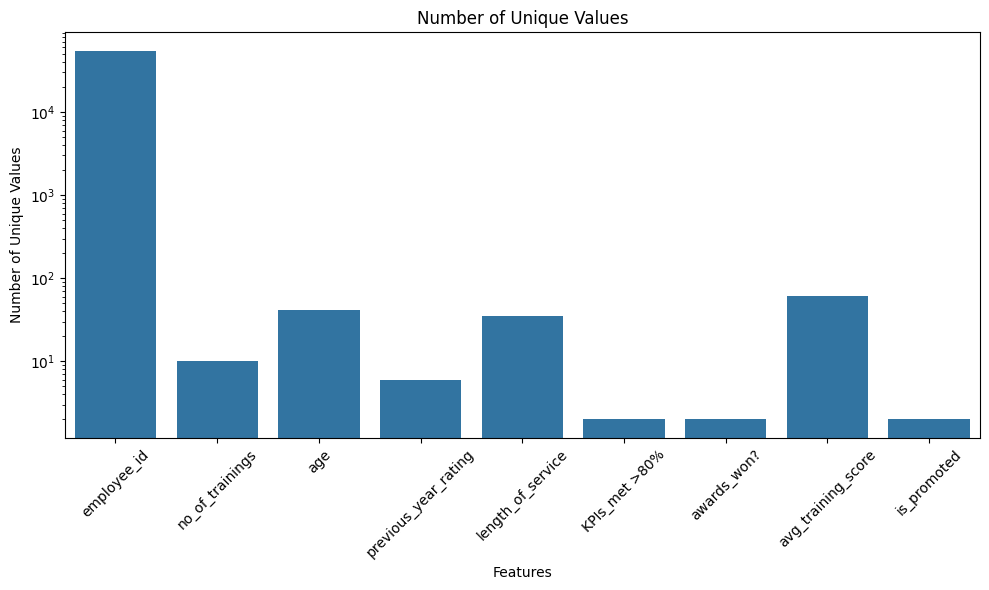

In [30]:
unique_values = train.select_dtypes(include='number').nunique()
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_values.index, y=unique_values.values)
plt.title('Number of Unique Values')
plt.xlabel('Features')
plt.ylabel('Number of Unique Values')
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Education status - Awards won

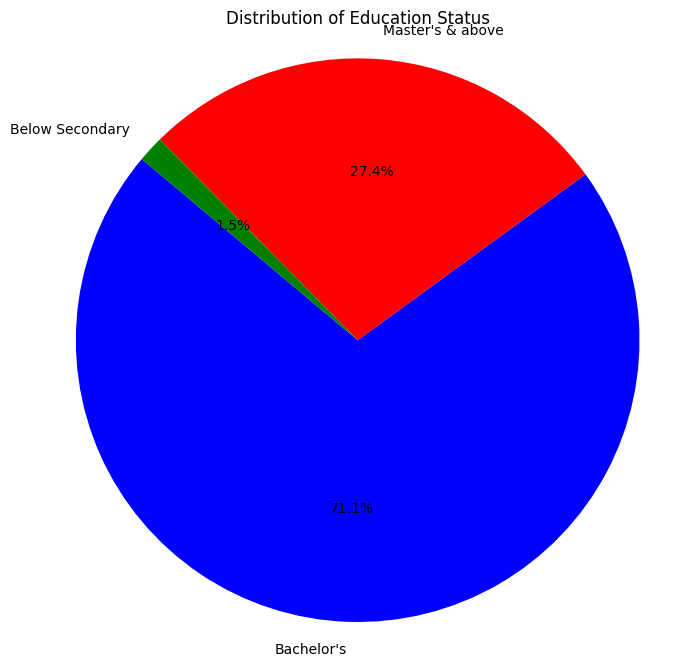

In [31]:
plt.figure(figsize=(8, 8))
education_counts = df['education'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green', 'orange'])
plt.title('Distribution of Education Status')
plt.axis('equal')
plt.show()

### Number of employess and their education status - Promotion

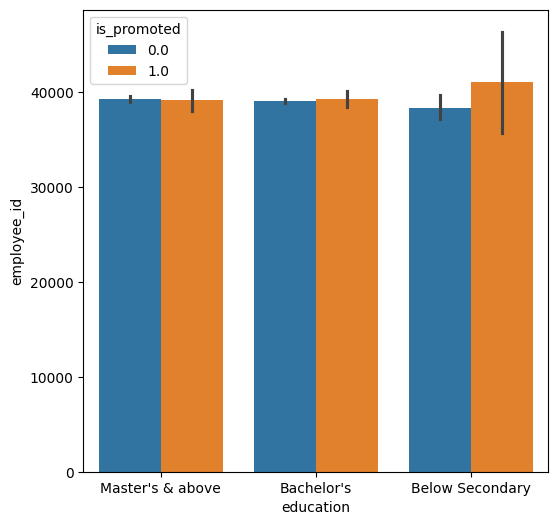

In [37]:
plt.figure(figsize=(6,6))
sns.barplot(x='education',y='employee_id',hue='is_promoted',data=df)
plt.show()

### Gender Distribution

C:\Users\Kishore\AppData\Local\Temp\ipykernel_11232\3684969823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette=['blue', 'red'])


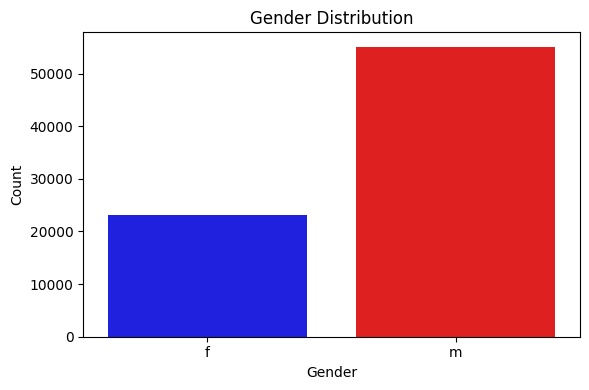

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette=['blue', 'red'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Length of Service by Recruitment Channel

C:\Users\Kishore\AppData\Local\Temp\ipykernel_11232\4216018081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='recruitment_channel', y='length_of_service', data=train, palette='Set1')


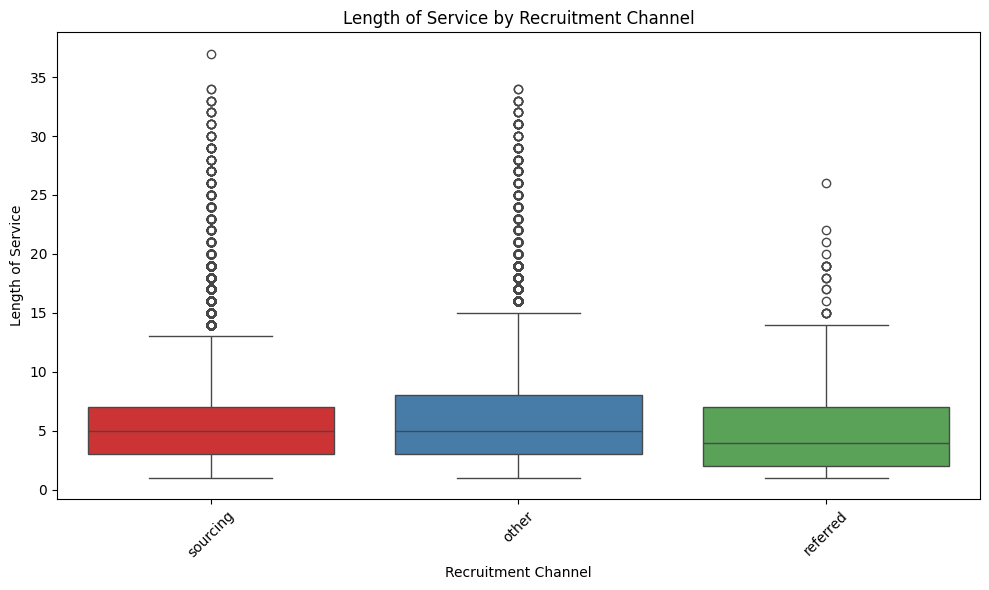

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='recruitment_channel', y='length_of_service', data=train, palette='Set1')
plt.title('Length of Service by Recruitment Channel')
plt.xlabel('Recruitment Channel')
plt.ylabel('Length of Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Age Distribution by Education

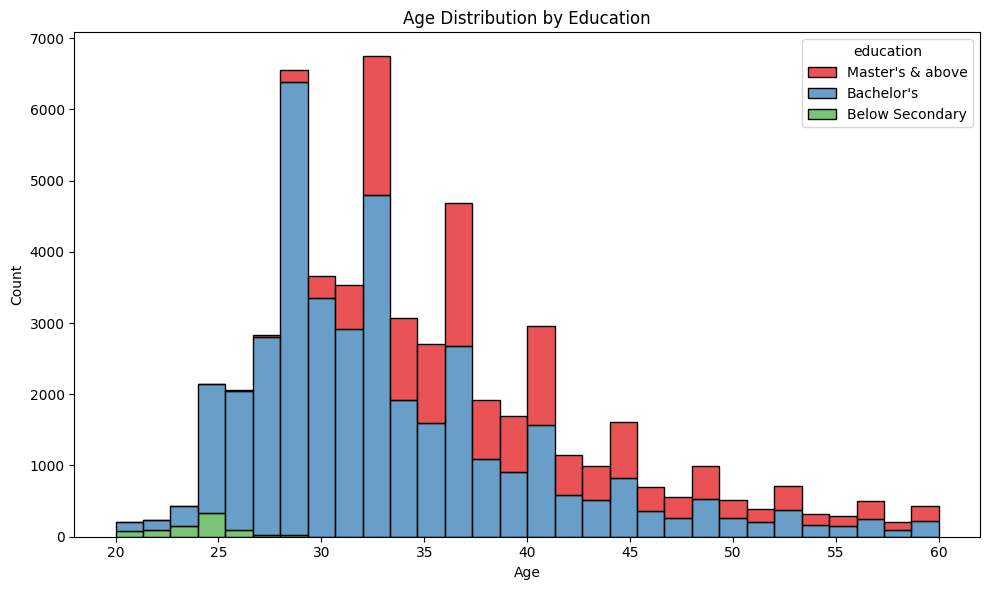

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='age', hue='education', multiple='stack', palette='Set1', bins=30)
plt.title('Age Distribution by Education')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Feature Engineering

### Correlation of features

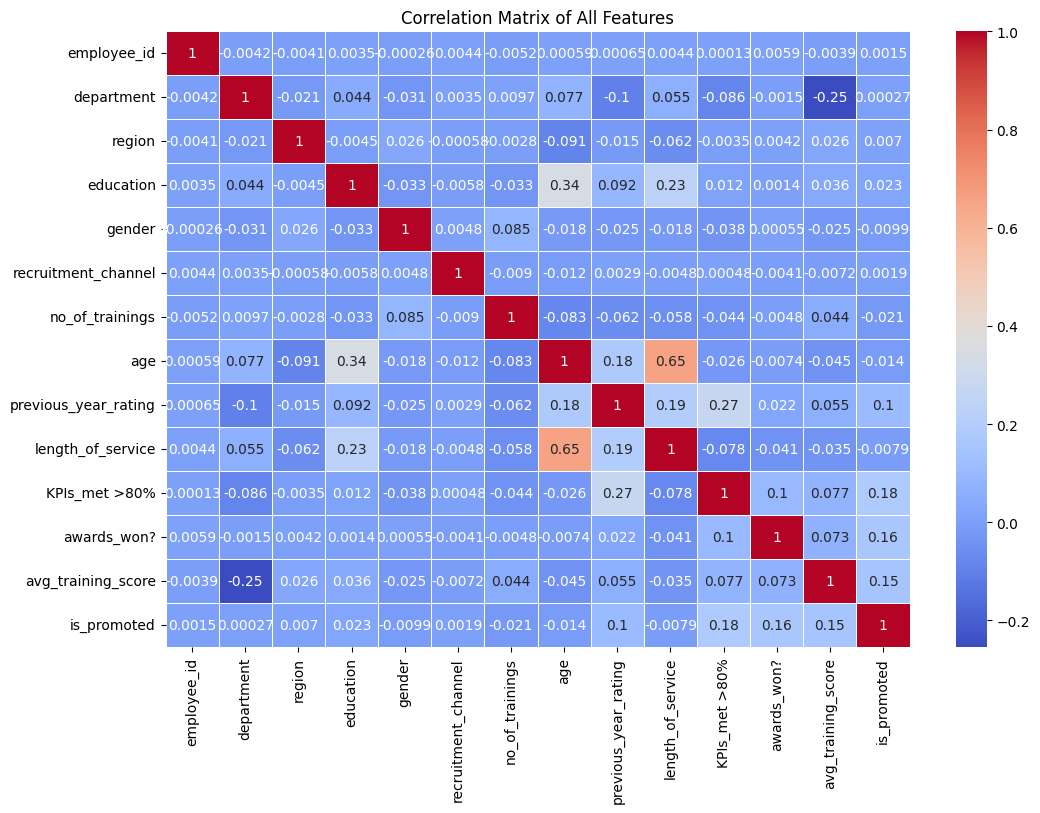

In [59]:
# Create a new variable 'df_encoded' to store the modified DataFrame
df_encoded = df.copy()

# Drop 'employee_id' column
# df_encoded = df_encoded.drop(['employee_id'], axis=1)

# Columns that are categorical
categorical_cols = ['department', 'education', 'gender', 'recruitment_channel', 'region']

# Encode the categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Now 'df_encoded' is ready for correlation analysis
correlation_matrix = df_encoded.corr()

# Plotting the correlation matrix using Seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Features')
plt.show()


In [60]:
# Create a new variable 'df_onehot' to store the modified DataFrame
df_onehot = df.copy()

# Drop 'employee_id' column
df_onehot = df_onehot.drop(['employee_id'], axis=1)

# Columns that are categorical
categorical_cols = ['department', 'education', 'gender', 'recruitment_channel', 'region']

# Apply one-hot encoding to categorical columns
df_onehot = pd.get_dummies(df_onehot, columns=categorical_cols, drop_first=True)

# Find the correlation matrix
correlation_matrix = df_onehot.corr()

# Extract correlation with 'is_promoted'
correlation_with_promoted = correlation_matrix['is_promoted'].sort_values(ascending=False)

# Print the correlations with 'is_promoted'
print(correlation_with_promoted)


is_promoted                     1.000000
KPIs_met >80%                   0.181526
awards_won?                     0.162240
avg_training_score              0.150046
previous_year_rating            0.103638
region_region_22                0.031453
region_region_4                 0.030277
department_Technology           0.026165
education_Master's & above      0.023402
region_region_7                 0.020863
region_region_17                0.017891
recruitment_channel_referred    0.016439
region_region_25                0.015242
region_region_28                0.013958
region_region_23                0.013427
department_Procurement          0.013227
department_Operations           0.008330
region_region_3                 0.005188
region_region_30                0.001770
region_region_13                0.000640
recruitment_channel_sourcing   -0.000458
region_region_8                -0.001043
education_Below Secondary      -0.001457
region_region_10               -0.001840
department_Finan

### Creating a Metric of Sum

In [61]:
df['sum_metric'] = df['awards_won?'] + df['KPIs_met >80%'] + df['previous_year_rating']
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,6.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,5.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,3.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,1.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,3.0


### Creating a total score column

In [62]:
df['total_score'] = df['avg_training_score'] * df['no_of_trainings']
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,6.0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,5.0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,3.0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,1.0,100
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,3.0,73


### Drop 'recruitment_channel', 'region', 'employee_id' columns

In [63]:
df = df.drop(['recruitment_channel', 'region', 'employee_id'], axis=1)
df.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,1,0,49,0.0,6.0,49
1,Operations,Bachelor's,m,1,30,5.0,4,0,0,60,0.0,5.0,60
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0,0,50,0.0,3.0,50
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0,0,50,0.0,1.0,100
4,Technology,Bachelor's,m,1,45,3.0,2,0,0,73,0.0,3.0,73


In [64]:
df = df.drop(df[(df['KPIs_met >80%'] == 0) & (df['previous_year_rating'] == 1.0) &
                         (df['awards_won?'] == 0) & (df['avg_training_score'] < 60) ].index)
df.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,1,0,49,0.0,6.0,49
1,Operations,Bachelor's,m,1,30,5.0,4,0,0,60,0.0,5.0,60
4,Technology,Bachelor's,m,1,45,3.0,2,0,0,73,0.0,3.0,73
5,Analytics,Bachelor's,m,2,31,3.0,7,0,0,85,0.0,3.0,170
6,Operations,Bachelor's,f,1,31,3.0,5,0,0,59,0.0,3.0,59


### Encoding Categorical Data

In [65]:

df['education'] = df['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
# test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                            #   (3, 2, 1))

le = LabelEncoder()
df['department'] = le.fit_transform(df['department'])
# test['department'] = le.fit_transform(test['department'])
df['gender'] = le.fit_transform(df['gender'])
# test['gender'] = le.fit_transform(test['gender'])

df.head()

C:\Users\Kishore\AppData\Local\Temp\ipykernel_11232\4001219552.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),


,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0.0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0.0,5.0,60
4,8,2,1,1,45,3.0,2,0,0,73,0.0,3.0,73
5,0,2,1,2,31,3.0,7,0,0,85,0.0,3.0,170
6,4,2,0,1,31,3.0,5,0,0,59,0.0,3.0,59


### Split the data to training and testing set

In [66]:
# Define the target variable (y) and features (X)
X = df.drop('is_promoted', axis=1)  # Features (all columns except 'is_promoted')
y = df['is_promoted']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the training and testing sets
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (56842, 12)
Testing set size: (14211, 12)


# Model Training 

### Decision Tree

In [69]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

### Random forest

In [70]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

### Logistic Regression Model

In [71]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Model Evaluation

In [81]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Not Promoted', 'Promoted'])
    confusion = confusion_matrix(y_test, y_pred)
    
    # Print the results
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(report)
    print("\nConfusion Matrix:")
    print(confusion)
    # print("\n" + "="*50 + "\n")
    
    return accuracy


### Decision tree

In [82]:
accuracy_dt = evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Decision Tree")

--- Decision Tree ---
Accuracy: 91.09%

Classification Report:
              precision    recall  f1-score   support

Not Promoted       0.95      0.95      0.95     13341
    Promoted       0.28      0.29      0.29       870

    accuracy                           0.91     14211
   macro avg       0.62      0.62      0.62     14211
weighted avg       0.91      0.91      0.91     14211


Confusion Matrix:
[[12689   652]
 [  614   256]]


### Random Forest

In [83]:
accuracy_rf = evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

--- Random Forest ---
Accuracy: 94.04%

Classification Report:
              precision    recall  f1-score   support

Not Promoted       0.95      0.99      0.97     13341
    Promoted       0.53      0.24      0.33       870

    accuracy                           0.94     14211
   macro avg       0.74      0.61      0.65     14211
weighted avg       0.93      0.94      0.93     14211


Confusion Matrix:
[[13153   188]
 [  659   211]]


### Logistic Regression

In [84]:
accuracy_lr = evaluate_model(lr_model, X_train, y_train, X_test, y_test, "Logistic Regression")

--- Logistic Regression ---
Accuracy: 93.82%

Classification Report:
              precision    recall  f1-score   support

Not Promoted       0.94      1.00      0.97     13341
    Promoted       0.44      0.04      0.07       870

    accuracy                           0.94     14211
   macro avg       0.69      0.52      0.52     14211
weighted avg       0.91      0.94      0.91     14211


Confusion Matrix:
[[13301    40]
 [  838    32]]


### Model Accuracy Comparision

In [85]:

model_results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_dt * 100, accuracy_rf * 100, accuracy_lr * 100]
})

print(model_results)

                 Model   Accuracy
0        Decision Tree  91.091408
1        Random Forest  94.039828
2  Logistic Regression  93.821687
